二维谐振子的静态薛定谔方程可以表示为：
$$\left[-\frac{\hbar^2}{2m}\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right) + \frac{1}{2}m\omega^2(x^2+y^2)\right]\psi(x,y) = E\psi(x,y)$$
其中，$\psi(x,y)$ 是波函数，$E$ 是能量本征值，$m$ 是粒子的质量，$\omega$ 是振动角频率。该方程描述了一个在二维平面上以谐振子运动方式振动的粒子，其势能与距离原点的距离平方成正比。

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from findiff import FinDiff
import matplotlib.pyplot as plt


x = y = np.linspace(-8, 8, 201)
dx = dy = x[1] - x[0]
X, Y = np.meshgrid(x, y)
V = 0.5 * (X**2 + Y**2)
H = -0.5 * (FinDiff(0, dx, 2) + FinDiff(1, dy, 2)).matrix(V.shape) + diags(V.reshape(-1))
energies, states = eigs(H, k=20, which='SR')

[]

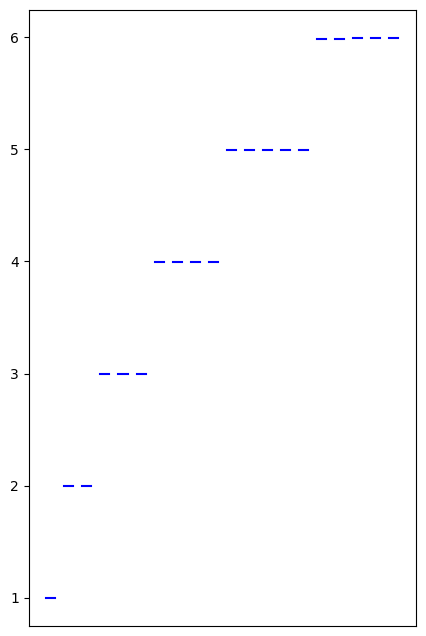

In [31]:
fig = plt.figure(figsize=(5, 8))
ax = fig.gca()
levels = [[(k, k + 0.5), (e.real, e.real)] for k, e in enumerate(sorted(energies, key=lambda x: x.real))]
for level in levels: 
    ax.plot(level[0], level[1], '-b')
ax.set_xticks([])

一维谐振子的静态薛定谔方程可以表示为：
$$-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + \frac{1}{2}m\omega^2x^2\psi(x) = E\psi(x)$$
其中，$\psi(x)$ 是波函数，$E$ 是能量本征值，$m$ 是粒子的质量，$\omega$ 是振动角频率。该方程描述了一个在线性谐振子势场中作谐振运动的粒子。

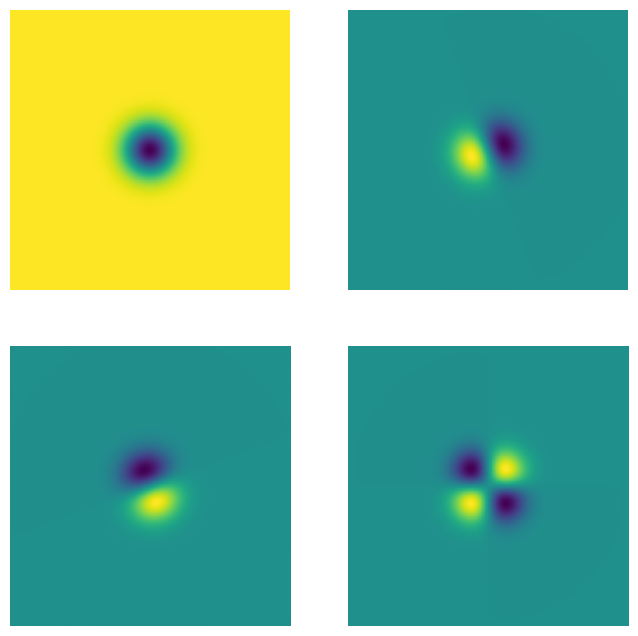

In [28]:
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, columns * rows + 1):
    img = states[:, i - 1].real.reshape((201, -1))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")
plt.show()